# 1 - Exploratory Data Analysis
In this noteboook, we will explore the [IMDb Spoilers Dataset](https://www.kaggle.com/rmisra/imdb-spoiler-dataset), through tables and visuals.

In [1]:
import pandas as pd
import numpy as np
import os
import pathlib

import matplotlib.pyplot as plt

Kaggle API is used to download the dataset from kaggle.

> _**Note**: There is a lot of documentation on how to use the Kaggle API in the command line interface (CLI). Some resources that might be helpful in setting up your system for `kaggle` python module are listed below._

> - [Techno Whisp](https://technowhisp.com/kaggle-api-python-documentation/) - Best online resource
> - [GitHub](https://github.com/Kaggle/kaggle-api) - Official Installation Documentation
> - [Kaggle](https://www.kaggle.com/docs/api) - Official Installation Documentation

The below cell will only run after kaggle is setup.

# Downloading Data

In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [3]:
# See the files present.
api.dataset_list_files('rmisra/imdb-spoiler-dataset').files

[IMDB_movie_details.json, IMDB_reviews.json]

In [4]:
# update the following variable to True to download the files listed above.
download_files = False

if download_files:
    # define the location of download.
    path = pathlib.Path('../data/org_dataset')
    print(f'Does path exist? - {path.exists()}')

    # Download all files of a dataset
    # Signature: dataset_download_files(dataset, path=None, force=False, quiet=True, unzip=False)
    api.dataset_download_files('rmisra/imdb-spoiler-dataset', path=path)

# Data Concating

In [5]:
# Update the following variable to consider the full dataset instead of a smaller sample.
use_sample = False

# locate data files
filenames = ['IMDB_movie_details.json', 'IMDB_reviews.json']
data_dir = pathlib.Path('../data/org_dataset')

if use_sample:
    data_dir = pathlib.Path('../data/sample_dataset')

# Read the json files.
movies_df = pd.read_json(data_dir / 'IMDB_movie_details.json', lines=True)
reviews_df = pd.read_json(data_dir / 'IMDB_reviews.json', lines=True)

In [6]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573913 entries, 0 to 573912
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   review_date     573913 non-null  object
 1   movie_id        573913 non-null  object
 2   user_id         573913 non-null  object
 3   is_spoiler      573913 non-null  bool  
 4   review_text     573913 non-null  object
 5   rating          573913 non-null  int64 
 6   review_summary  573913 non-null  object
dtypes: bool(1), int64(1), object(5)
memory usage: 26.8+ MB


In [7]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       1572 non-null   object 
 1   plot_summary   1572 non-null   object 
 2   duration       1572 non-null   object 
 3   genre          1572 non-null   object 
 4   rating         1572 non-null   float64
 5   release_date   1572 non-null   object 
 6   plot_synopsis  1572 non-null   object 
dtypes: float64(1), object(6)
memory usage: 86.1+ KB


In [8]:
# the rating column, though common between the tables, is not the same for both.
movies_df.describe(), reviews_df.describe()

(            rating
 count  1572.000000
 mean      7.071819
 std       0.967966
 min       2.400000
 25%       6.500000
 50%       7.100000
 75%       7.800000
 max       9.500000,
               rating
 count  573913.000000
 mean        6.954254
 std         2.956295
 min         1.000000
 25%         5.000000
 50%         8.000000
 75%        10.000000
 max        10.000000)

In [9]:
# rename ratings before merging the tables.
movies_df['avg_movie_rating'] = movies_df['rating']
movies_df2 = movies_df.drop('rating', axis=1)

reviews_df['rating_by_user'] = reviews_df['rating']
reviews_df2 = reviews_df.drop('rating', axis=1)

In [10]:
# joining the two dataframes with `movie_id`
imdb_df = pd.merge(reviews_df2, movies_df2, 'left', on='movie_id')
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 573913 entries, 0 to 573912
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   review_date       573913 non-null  object 
 1   movie_id          573913 non-null  object 
 2   user_id           573913 non-null  object 
 3   is_spoiler        573913 non-null  bool   
 4   review_text       573913 non-null  object 
 5   review_summary    573913 non-null  object 
 6   rating_by_user    573913 non-null  int64  
 7   plot_summary      573906 non-null  object 
 8   duration          573906 non-null  object 
 9   genre             573906 non-null  object 
 10  release_date      573906 non-null  object 
 11  plot_synopsis     573906 non-null  object 
 12  avg_movie_rating  573906 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(10)
memory usage: 57.5+ MB


# Saving Data

In [11]:
# Save data into the org_dataset folder.
path = data_dir / 'imdb_full_dataset.csv'
imdb_df.to_csv(path, index=False)

if path.exists():
    print(f'File saved to {path}.')
else:
    print('File not saved.')

File saved to ../data/org_dataset/imdb_full_dataset.csv.


# Exploratory Data Analysis

In [12]:
imdb_df.describe()

,rating_by_user,avg_movie_rating
count,573913.000000,573906.000000
mean,6.954254,7.293693
std,2.956295,0.959311
min,1.000000,2.400000
25%,5.000000,6.700000
50%,8.000000,7.400000
75%,10.000000,8.000000
max,10.000000,9.500000


Text(0, 0.5, 'Number of reviews')

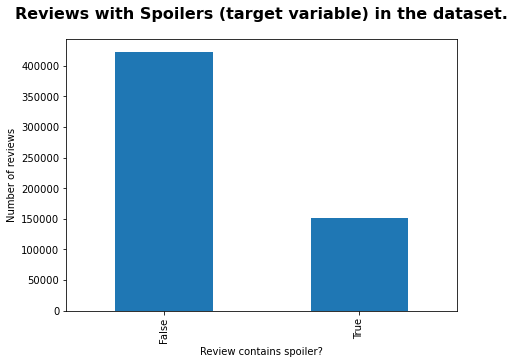

In [13]:
fig, ax = plt.subplots(figsize=(7,5))

imdb_df['is_spoiler'].value_counts().plot(kind='bar', ax=ax)

ax.set_title('Reviews with Spoilers (target variable) in the dataset.',
             fontdict={'size': 16, 'weight': 'bold'}, pad=20)
ax.set_xlabel('Review contains spoiler?')
ax.set_ylabel('Number of reviews')

From the above visual, we know that the dataset is highly biased - there are many more examples of non-spoiler reviews than with spoiler. Some data processing might be required to get rid of the discrepency in the data. Suggested action:
- PCA
- Synthetic 


In [14]:
# View the top movie reviewers in the dataset.
print('Top 5 movie reviewers.')
imdb_df.groupby('user_id').count()['movie_id'].sort_values(ascending=False).head(10)

Top 5 movie reviewers.


user_id
ur2898520     1303
ur4248714     1021
ur0453068      806
ur60028700     770
ur20552756     755
ur4888011      701
ur2488512      681
ur1234929      680
ur1293485      660
ur0482513      641
Name: movie_id, dtype: int64

In [15]:
# Which movies recieved the most number of reviews?
print('Top 5 movies reviewed.')
top10_movies = imdb_df.groupby('movie_id').count()['user_id'].sort_values(ascending=False).head(10)
top10_movies

Top 5 movies reviewed.


movie_id
tt0468569    4845
tt0111161    4361
tt0167260    2729
tt0137523    2480
tt0068646    2137
tt0110912    1994
tt0108052    1151
tt0050083     916
tt0803096     751
tt5109784     751
Name: user_id, dtype: int64

In [16]:
#plot synapses of the top 3
for movie_id in top10_movies.iloc[:3].index:
    print(imdb_df[imdb_df['movie_id'] == movie_id].iloc[0]['plot_summary'])
    break

Set within a year after the events of Batman Begins, Batman, Lieutenant James Gordon, and new district attorney Harvey Dent successfully begin to round up the criminals that plague Gotham City until a mysterious and sadistic criminal mastermind known only as the Joker appears in Gotham, creating a new wave of chaos. Batman's struggle against the Joker becomes deeply personal, forcing him to "confront everything he believes" and improve his technology to stop him. A love triangle develops between Bruce Wayne, Dent and Rachel Dawes.                Written by
Leon Lombardi


spoiler_ratio = (# of movies with spoilers) / (# of movies)

In [17]:
imdb_df.groupby('rating_by_user').mean()

,is_spoiler,avg_movie_rating
rating_by_user,,
1,0.303809,6.932034
2,0.332841,6.905826
3,0.333727,6.949326
4,0.330235,6.946865
5,0.317686,6.983820
6,0.293556,7.016467
7,0.269007,7.093468
8,0.253275,7.284896
9,0.241924,7.542058


In [18]:
# how many different movies are there in the dataset.
len(imdb_df['movie_id'].unique())

1572

In [19]:
# how many different users are there in the dataset.
len(imdb_df['user_id'].unique())

263407